*Supporting textbook chapters for week 1: 2, 3 and 4.3*

This is an example of "lecture notes".
As you will quickly find out, this course is by nature a lab course.
Therefore, my "lecture notes" will not often follow the linear progression of regular lecture notes.
This is particularly true for this first lecture, in which I merely want to give you pointers to do the first lab.

# General Problem-Solving Approach

1. **Math model:** often, but not always, continuous.
2. **Translate and discretize:** set up discrete arrays of independent variables (e.g., $x$, $t$), dependent variables (e.g. $v(t)$, $a(t)$), and define operators on these variables ($dv/dt$, $ma$...) according to the model.
3. **Initialize** parameters and variables appropriately. Give them meaningful names, and avoid hard-coding parameter values. 
4. **Evaluate:** run algorithms (using the operators) on these variables. Make your code modular, i.e. make separate functions for various parts of the algorithms rather than making one long block of code.
5. **Debug:** bang your head against the wall for awhile to figure out why it didn't work properly. Carefully read any error messages produced. Add print statements to see intermediate values of variables. You may want to use a built-in debugger in an IDE. Remember, there's almost always another bug sitting somewhere in your code.
6. **Analyze:** some extra processing of the raw results (figures, etc.)
7. **Sanity check:** ask yourself whether your analysis outputs make sense (are all values the correct order of magnitude? are plots the expected shapes? etc.) If not, go back to step 5.

# Pseudocode and Comments

The concept of "Pseudocode" is loosely defined, see for example https://en.wikipedia.org/wiki/Pseudocode. In this lecture, I will use a **very** loose definition for it, i.e., mostly plain English with bullet points.
You are free to use your own version. Just make sure that it is understandable by someone who speaks English and is vaguely familiar with the problem you're trying to solve.

* Pseudocode is the planned version of your code. It describes your algorithm(s).
* Writing pseudocode helps ensure that your planned logic for the algorithm is sound. Therefore you should write pseudocode before starting any actual code.
* Pseudocode should be concise, logical, step-by-step.
* Coding = turning your pseudocode $\to$ specific programming language. You should be able to take your pseudocode and convert it into any typical programming language.
* You may distribute your pseudocode throughout your real code, in the form of **comments**, as you go through the process of coding. Also **keep a copy of the pseudocode intact** so you can refer back to it, and ensure each block of code starts with a brief overview of what the block will do.

Examples for sequential stuff:
* Input: `READ`, `OBTAIN`, `GET`
* Initialize: `SET`, `DEFINE`
* Compute: `COMPUTE`, `CALCULATE`, `DETERMINE`
* Add one: `INCREMENT`, `BUMP`
* Output: `PRINT`, `DISPLAY`, `PLOT`, `WRITE`

Examples for conditions and loops:
* `WHILE`, `IF-THEN-ELSE`, `REPEAT-UNTIL`, `CASE`, `FOR`

Should also include calling functions:
* `CALL`

In [ ]:
# Read radius r from keyboard
# Read angle theta in degs from keyboard input
# convert degrees into radians
# Compute x, y = r*(cos(theta), sin(theta))
# print the result to screen

In [1]:
# Read radius from keyboard input
# Read angle in degrees from keyboard input
# Convert angle in radians
# compute x and y from r an theta
# Print the result to screen


Alternative: typeset the pseudocode in your report.

In [2]:
import numpy as np  # import numpy

In [3]:
# From keyboard, read the radius and save.
r = float(input("Enter r: "))

Enter r: 13


In [4]:
# From keyboard, read the angle in degrees and save.
theta = float(input("Enter theta in degs: "))

Enter theta in degs: 45


In [7]:
# Do the conversion from degrees to radians
theta_r = theta/180*np.pi

In [8]:
# Compute $(x, y) = r(\cos\theta_r, \sin\theta_r)$.
x, y = r*np.cos(theta_r), r*np.sin(theta_r) 

In [10]:
# Print result (x, y) to screen.
print("x = {0:.4f}, y = {1:.2e}".format(x, y))

x = 9.1924, y = 9.19e+00


# Example 1

Suppose the problem is to find the number of radioactive atoms of uranium $N$ as a function of time given initial $N_0$ and
$$\frac{dN}{dt} = -\frac{N}{\tau}.$$
($\tau =$ decay constant), using Euler method for integration, for a duration of $5\tau$.

In [15]:
# Pseudocode:
# DEFINE decay constant tau, initial N0, duration, timestep, number of integration points nvals
# SET duration = 5tau
# SET nvals = 1001
# INITIALIZE N_array with zeros, first value = N0
# INITIALIZE time_array with nvals equally-spaced values between 0 and duration
# COMPUTE timestep dt = time_array spacing
# FOR 100 iterations:
#     COMPUTE next value of N_array: CALL Decay using current value, timestep, tau
# PLOT N_array vs. time_array

In [4]:
""" Code that computes the number of radioactive atoms of uranium N
as function of time, given tau and N0 and using Euler method. """

# Import packages
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def Decay(previous, timestep, lifetime):
    return (previous - timestep * previous / lifetime)

In [17]:
# Define decay constant tau, initial N0, and duration
tau = 6.446e9  # [s] tau for U238
N0 = 1e6  # [1] initial N
duration = 5*tau  # [s] the end of the simulation time
# Initialize time array
nvals = 1001
time = np.linspace(0., duration, nvals)
# Compute dt the time step
dt = time[1] - time[0]
# Initialize a number array with same number of elements
N = 0*time
N[0] = N0

In [18]:
# 5. FOR nvals iterations:
#        Increment the N array with Euler: N[i+1] = N[i] - dt*N[i]/tau
for ii in range(nvals-1):
    N[ii+1] = Decay(N[ii], dt, tau)

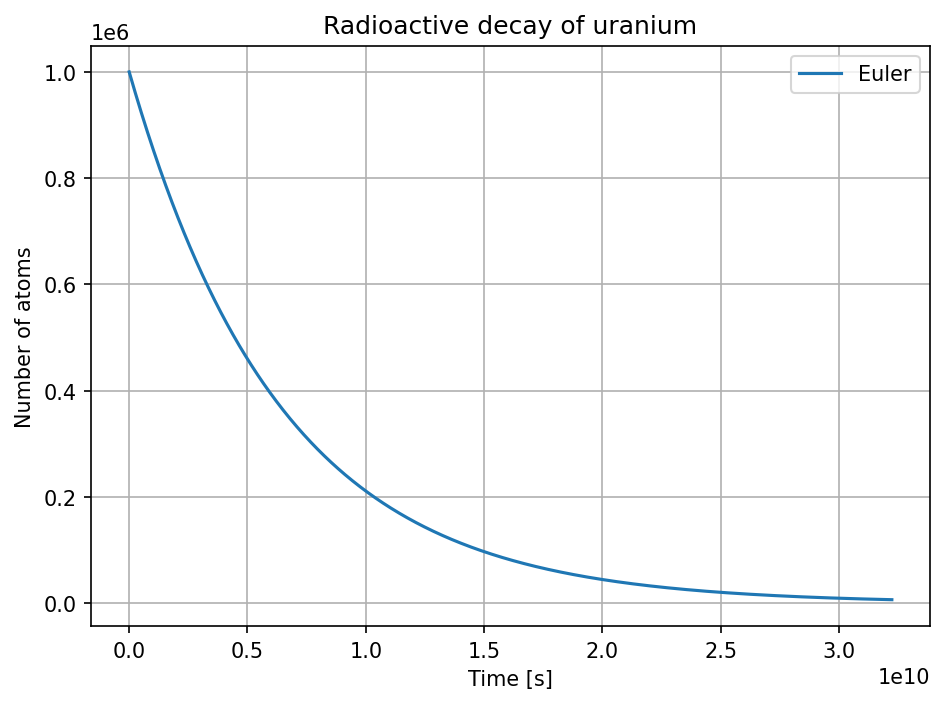

In [24]:
# 6. Plot N vs. t
plt.figure(dpi=150)
plt.plot(time, N, label='Euler')
plt.title('Radioactive decay of uranium')
plt.xlabel('Time [s]')
plt.ylabel('Number of atoms')
# plt.plot(time, N0*np.exp(-time/tau), '--', label
plt.grid()
plt.legend()
plt.tight_layout()

# Example 2

Given position $x(t)$ of a particle undergoing SHO with angular frequecy 0.5 rad/s, initial position 3 m, initial velocity 0 m/s, calculate velocity and acceleration using simple finite difference

In [27]:
# import numpy as np  
# import matplotlib.pyplot as plt

In [25]:
# Define parameters
omega = 0.5  # [rad/s] angular frequency
A = 3.  # [m] displacement amplitude
# discretize time
endtime = 30. # [s] duration of simulation
N = 101 # number of time points
t = np.linspace(0, endtime, N) 
# arrays of dependent variables: positions, velocities, accelerations
x = np.empty(N)  
v = np.empty(N-1) 
a = np.empty(N-2)  

In [31]:
# operation for finite difference algorithm
def finite_diff(val1, val2, delta):
    return (val2 - val1) / delta

In [26]:
# Initialize: define signal on discretized grid
x = A*np.cos(omega*t)

In [32]:
# Define velocity using finite differences: v = Delta x/Delta t
dt = t[1] - t[0]
for k in range(N-1):
    v[k] = finite_diff (x[k], x[k+1], dt)

# Define acceleration using finite differences: a = Delta v/Delta t
for k in range(N-2):
    a[k] = finite_diff (v[k], v[k+1], dt)

In [33]:
# debug: print results
print("t is ", t)

t is  [ 0.   0.3  0.6  0.9  1.2  1.5  1.8  2.1  2.4  2.7  3.   3.3  3.6  3.9
  4.2  4.5  4.8  5.1  5.4  5.7  6.   6.3  6.6  6.9  7.2  7.5  7.8  8.1
  8.4  8.7  9.   9.3  9.6  9.9 10.2 10.5 10.8 11.1 11.4 11.7 12.  12.3
 12.6 12.9 13.2 13.5 13.8 14.1 14.4 14.7 15.  15.3 15.6 15.9 16.2 16.5
 16.8 17.1 17.4 17.7 18.  18.3 18.6 18.9 19.2 19.5 19.8 20.1 20.4 20.7
 21.  21.3 21.6 21.9 22.2 22.5 22.8 23.1 23.4 23.7 24.  24.3 24.6 24.9
 25.2 25.5 25.8 26.1 26.4 26.7 27.  27.3 27.6 27.9 28.2 28.5 28.8 29.1
 29.4 29.7 30. ]


In [34]:
print("x is ", x)

x is  [ 3.          2.96631323  2.86600947  2.70134131  2.47600684  2.19506661
  1.8648299   1.49271314  1.08707326  0.65702006  0.21221161 -0.23736267
 -0.68160628 -1.11054249 -1.51453831 -1.88452087 -2.21218115 -2.49016061
 -2.71221643 -2.87336171 -2.96997749 -2.99989398 -2.96243931 -2.85845464
 -2.69027525 -2.46167807 -2.17779691 -1.84500713 -1.47078246 -1.0635272
 -0.6323874  -0.18704554  0.26249695  0.70614433  1.13393323  1.53625643
  1.90407863  2.22913932  2.50413835  2.72289984  2.88051086  2.97343182
  2.99957591  2.95835599  2.85069778  2.67901903  2.4471753   2.16037329
  1.82505394  1.44874782  1.03990595  0.60771004  0.16186626 -0.28761268
 -0.73063246 -1.15724381 -1.55786596 -1.9235018  -2.24593994 -2.5179391
 -2.73339079 -2.8874564  -2.97667598 -2.99904582 -2.95406357 -2.84273941
 -2.66757346 -2.43249955 -2.14279696 -1.80497176 -1.42661078 -1.01621121
 -0.58298972 -0.13667554  0.31270808  0.75506895  1.1804726   1.57936538
  1.94278902  2.2625818   2.53156188  2.7436885

In [35]:
print("a is ", a) 

a is  [-0.74018889 -0.71515993 -0.67407002 -0.61784195 -0.54773849 -0.46533399
 -0.3724791  -0.27125913 -0.16394727 -0.0529535   0.05922949  0.17008231
  0.27711545  0.37792517  0.47024751  0.5520091   0.62137376  0.67678371
  0.71699455  0.74110324  0.74856835  0.73922223  0.71327476  0.67130869
  0.61426647  0.54342915  0.46038758  0.3670067   0.26538364  0.15780064
  0.04667377 -0.06550128 -0.17620533 -0.28295217 -0.38334453 -0.47512779
 -0.55624071 -0.62486165 -0.67944956 -0.71877849 -0.7419652  -0.74848898
 -0.73820331 -0.71133918 -0.66849991 -0.61064757 -0.53908141 -0.45540863
 -0.36150836 -0.2594894  -0.15164286 -0.04039075  0.07176845  0.18231589
  0.2887689   0.38873679  0.47997448  0.56043299  0.62830538  0.68206738
  0.72051162  0.74277472  0.74835671  0.73713221  0.70935332  0.66564388
  0.60698551  0.53469556  0.45039749  0.35598447  0.25357681  0.14547436
  0.03410487 -0.07803055 -0.18841356 -0.29456522 -0.39410157 -0.48478725
 -0.56458566 -0.63170469 -0.68463699 -0.72219

In [44]:
# plot results
def plot_results(t, x, v, a, N):
    plt.figure()

    plt.subplot(3, 1, 1)
    plt.plot(t, x)
    plt.title("SHO motion")
    plt.ylabel('x [m]')

    plt.subplot(3, 1, 2)
    plt.plot(t[:-1], v)
    plt.ylabel('v [m/s]')

    plt.subplot(3, 1, 3)
    plt.plot(t[:-2], a)
    plt.ylabel('a [m/s/s]')
    plt.xlabel('t [s]')

    plt.tight_layout()
    # plt.savefig('T01.pdf')  # saves a pdf figure on disk

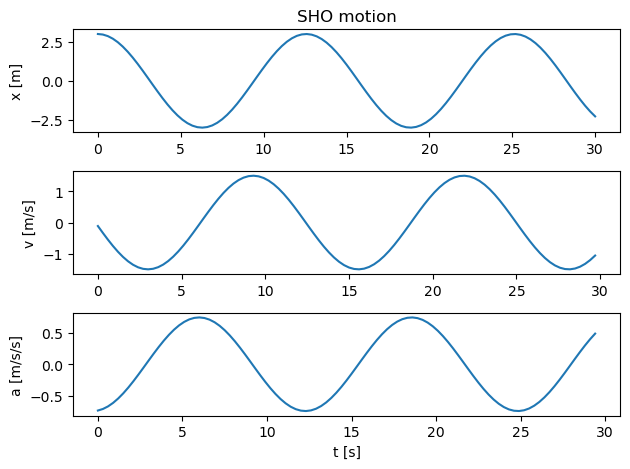

In [45]:
plot_results(t, x, v, a, N)